In [24]:
#Packages
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import itertools
import random

In [148]:
#Importation of networks and attributes
ELadvice=  nx.read_edgelist('ELadvice_edgelist.txt',comments="node",create_using=nx.DiGraph(),nodetype=int)
ELcowork =  nx.read_edgelist('ELcowork_edgelist.txt',comments="node",create_using=nx.Graph(),nodetype=int)
ELfriend = nx.read_edgelist('ELfriend_edgelist.txt',comments="node",create_using=nx.DiGraph(),nodetype=int)
attr = pd.read_table('ELnodeAttributes.txt', sep = "\t")

In [149]:
#Association of attribute with network ElFriend
ELNodeData = attr.set_index('Node').to_dict('index').items()
ELfriend.add_nodes_from(ELNodeData)

In [150]:
#Association for the other networks 
ELadvice.add_nodes_from(ELNodeData)
ELcowork.add_nodes_from(ELNodeData)

In [151]:
#Proportion of women 
attr['Gender'].value_counts(normalize=True)

Gender
1    0.746479
2    0.253521
Name: proportion, dtype: float64

# Descriptive Statistics #

25% of the lawyers are women in our sample. 

In [10]:
Deg = dict(ELfriend.in_degree())

In [11]:
genre_degrees = {}

#We get the degree by gender
for node, data in ELNodeData:  
    genre = data.get('Gender') 
    if genre:
        if genre not in genre_degrees:
            genre_degrees[genre] = []
        genre_degrees[genre].append(Deg.get(node, 0))

# Calculus of average degree
average_degree_by_genre = {}
for genre, degrees in genre_degrees.items():
    average_degree_by_genre[genre] = sum(degrees) / len(degrees)

# Print
for genre, avg_degree in average_degree_by_genre.items():
    print(f"{genre}: {avg_degree}")

1: 8.056603773584905
2: 8.222222222222221


In [12]:
#Conversion of the attributes in a dataframe
df = pd.DataFrame.from_dict(ELNodeData)
df[1] = df[1].astype(str)
df = df[1].str.split(":", expand=True)
df = df.rename(columns={1 : 'status', 2: 'Gender', 3: 'Office', 4:'Senior', 5:'Age', 6:'Spec', 7:'School'})
df = df.drop(0, axis=1)
#We just keep the value
for i in range(0, df.shape[0]):
        df["School"][i]=df["School"][i].replace("}",'')
for i in range(0, df.shape[0]):
        df["status"][i]=df["status"][i].replace(", 'Gender'",'')
for i in range(0, df.shape[0]):
        df["Gender"][i]=df["Gender"][i].replace(", 'Office'",'')
for i in range(0, df.shape[0]):
        df["Office"][i]=df["Office"][i].replace(", 'Senior'",'')
for i in range(0, df.shape[0]):
        df["Senior"][i]=df["Senior"][i].replace(", 'Age'",'')
for i in range(0, df.shape[0]):
        df["Age"][i]=df["Age"][i].replace(", 'Spec'",'')
for i in range(0, df.shape[0]):
        df["Spec"][i]=df["Spec"][i].replace(", 'School'",'')

df

/tmp/ipykernel_272/2746766153.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["School"][i]=df["School"][i].replace("}",'')
/tmp/ipykernel_272/2746766153.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0

,status,Gender,Office,Senior,Age,Spec,School
0,1,1,1,31,64,1,1
1,1,1,1,32,62,2,1
2,1,1,2,13,67,1,1
3,1,1,1,31,59,2,3
4,1,1,2,31,59,1,2
...,...,...,...,...,...,...,...
66,2,2,1,1,35,1,2
67,2,1,1,1,26,1,3
68,2,2,1,1,38,1,3
69,2,1,1,1,31,2,2


<function matplotlib.pyplot.show(close=None, block=None)>

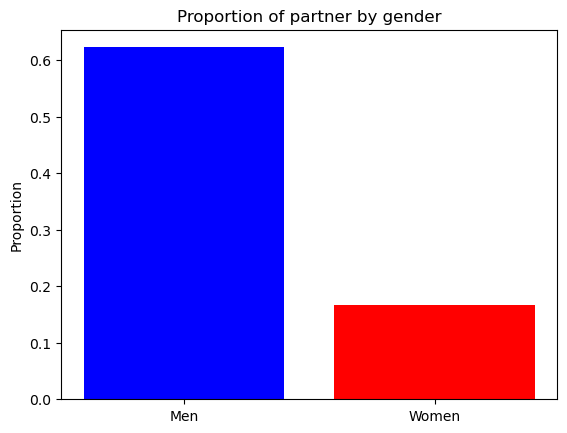

In [125]:
#Repartition of partner and associate by gender 
for colonne in df.columns: #Convert in number 
    df[colonne] = pd.to_numeric(df[colonne])

#Number of status by gender
nb_pm = df[(df['status'] == 1) & (df['Gender'] == 1)].shape[0] #Number of men partner 
nb_pf = df[(df['status'] == 1) & (df['Gender'] == 2)].shape[0] #Number of women partner 
nb_am = df[(df['status'] == 2) & (df['Gender'] == 1)].shape[0] #Number of men associate 
nb_af = df[(df['status'] == 2) & (df['Gender'] == 2)].shape[0] #Number of women associate

#proportion
prop_pm = nb_pm/(nb_pm + nb_am)
prop_pf = nb_pf/(nb_pf + nb_af)

#graph
plt.bar(["Men", "Women"],[prop_pm, prop_pf], color =['Blue', 'red'])
plt.ylabel('Proportion')
plt.title ('Proportion of partner by gender')
plt.savefig('Graphs/partner_gender.jpg')
plt.show

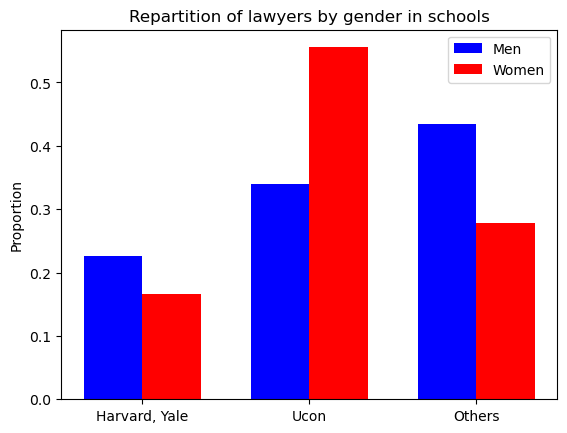

In [126]:
#I feel there's hierarchy between school so I'd like to see the difference by gender between schools
#Numbers
nb_1m = df[(df['School'] == 1) & (df['Gender'] == 1)].shape[0] #Number of men partner 
nb_1f = df[(df['School'] == 1) & (df['Gender'] == 2)].shape[0] #Number of women partner 
nb_2m = df[(df['School'] == 2) & (df['Gender'] == 1)].shape[0] #Number of men associate 
nb_2f = df[(df['School'] == 2) & (df['Gender'] == 2)].shape[0] #Number of women associate
nb_3m = df[(df['School'] == 3) & (df['Gender'] == 1)].shape[0] #Number of men associate 
nb_3f = df[(df['School'] == 3) & (df['Gender'] == 2)].shape[0] #Number of women associate
tot_m = nb_1m + nb_2m + nb_3m
tot_f = 71 - tot_m

#proportion
prop_1m = nb_1m/tot_m
prop_1f = nb_1f/tot_f

prop_2m = nb_2m/tot_m
prop_2f = nb_2f/tot_f

prop_3m = nb_3m/tot_m
prop_3f = nb_3f/tot_f

#Graph 
# Def of proportions
Men = [prop_1m, prop_2m, prop_3m]
Women = [prop_1f, prop_2f, prop_3f]

#Parameters
x = np.arange(len(Men))
width = 0.35

# Draw
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Men, width, label='Men', color='blue')
rects2 = ax.bar(x + width/2, Women, width, label='Women', color='red')

#Labels, title, save and show
ax.set_ylabel('Proportion')
ax.set_title('Repartition of lawyers by gender in schools')
ax.set_xticks(x)
ax.set_xticklabels(['Harvard, Yale', 'Ucon', 'Others'])
ax.legend()
plt.savefig('Graphs/gender_school.jpg')
plt.show()

/tmp/ipykernel_271/3719967523.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_age_counts = df.replace({'Gender': {1: 'Men', 2: 'Women'}}).groupby(['Gender', 'Age_Category']).size().unstack()


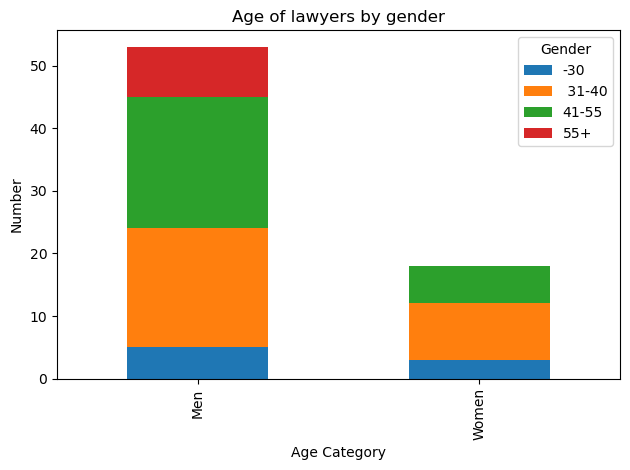

In [41]:
#Creation of age category and graph
df_cate_age = pd.cut(df['Age'], bins=[0, 30, 40, 55, 100], labels=['-30', ' 31-40', '41-55', '55+'])
df['Age_Category'] = df_cate_age
gender_age_counts = df.replace({'Gender': {1: 'Men', 2: 'Women'}}).groupby(['Gender', 'Age_Category']).size().unstack()
gender_age_counts.plot(kind='bar', stacked=True)

#Labels and show
plt.xlabel('Age Category')
plt.ylabel('Number')
plt.title('Age of lawyers by gender')
plt.legend(title='Gender')
plt.tight_layout()
plt.savefig("Graphs/age_gender.jpg")
plt.show()

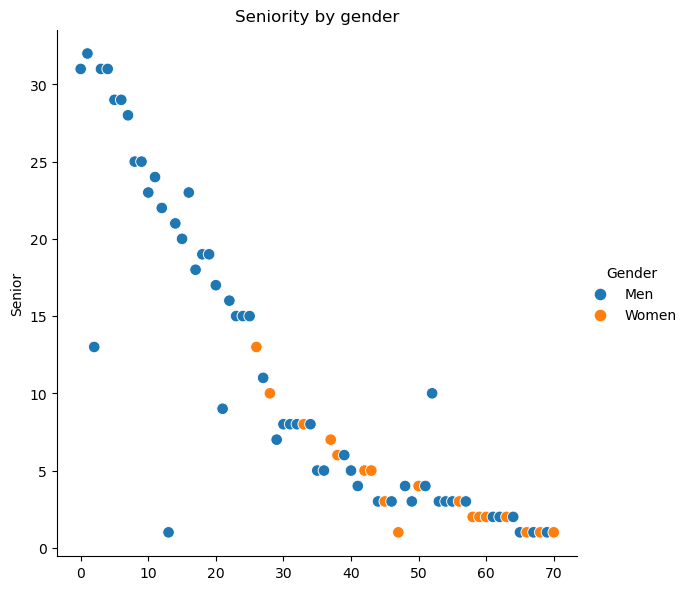

In [42]:
# Créez une variable numérique pour x basée sur les indices des lignes de votre DataFrame
x_values = range(len(df))

# Utilisez cette variable numérique comme valeur de x dans sns.relplot()
gender_age_counts = df.replace({'Gender': {1: 'Men', 2: 'Women'}})
sns.relplot(x=x_values, y="Senior", hue="Gender", data=gender_age_counts, height=6, s=70)
plt.title('Seniority by gender')
plt.savefig("Graphs/seniority_gender.jpg")
plt.show()

In [ ]:
Other parameters can have importance? 

Here, we will compare distribution of centrality by gender. We will look it for advice, for example. 

Note des trus à faire :
- Comparer centralité
- Random graph
- Comparer statuts

We will test outdegree, indegree, closeness centrality for friend : who is friend is who 
Betweenness centrality for advice : idea to indentify gatekeepers in advice. 
eigenvalue for cowork : who is more influent 

## Comparison of centrality ## 

We will compare centrality for friendship


In [23]:
indeg = nx.in_degree_centrality(ELfriend)
indegdf = pd.DataFrame.from_dict(indeg, orient='index', columns=['In-Degree Centrality'])
indegdf = indegdf.sort_index(axis = 0, ascending = True) #We sort by index
indegdf = indegdf.reset_index() #Reset of index to allow merging
indegdf

,index,In-Degree Centrality
0,1,0.071429
1,2,0.142857
2,3,0.057143
3,4,0.200000
4,5,0.071429
...,...,...
66,67,0.042857
67,68,0.071429
68,69,0.057143
69,70,0.071429


In [26]:
df2 = df.merge(indegdf, how='left', left_index=True, right_index=True)
df2 = df2.drop('index', axis=1)
df2

,status,Gender,Office,Senior,Age,Spec,School,In-Degree Centrality
0,1,1,1,31,64,1,1,0.071429
1,1,1,1,32,62,2,1,0.142857
2,1,1,2,13,67,1,1,0.057143
3,1,1,1,31,59,2,3,0.200000
4,1,1,2,31,59,1,2,0.071429
...,...,...,...,...,...,...,...,...
66,2,2,1,1,35,1,2,0.042857
67,2,1,1,1,26,1,3,0.071429
68,2,2,1,1,38,1,3,0.057143
69,2,1,1,1,31,2,2,0.071429


In [34]:
outdeg = nx.out_degree_centrality(ELfriend)
outdegdf = pd.DataFrame.from_dict(outdeg, orient='index', columns=['Out-Degree Centrality'])
outdegdf = outdegdf.sort_index(axis = 0, ascending = True) #We sort by index
outdegdf = outdegdf.reset_index() #Reset of index to allow merging
outdegdf

,index,Out-Degree Centrality
0,1,0.057143
1,2,0.057143
2,3,0.000000
3,4,0.214286
4,5,0.042857
...,...,...
66,67,0.057143
67,68,0.085714
68,69,0.071429
69,70,0.100000


In [35]:
df3 = df2.merge(outdegdf, how='left', left_index=True, right_index=True)
df3 = df3.drop('index', axis=1)
df3

,status,Gender,Office,Senior,Age,Spec,School,In-Degree Centrality,Out-Degree Centrality
0,1,1,1,31,64,1,1,0.071429,0.057143
1,1,1,1,32,62,2,1,0.142857,0.057143
2,1,1,2,13,67,1,1,0.057143,0.000000
3,1,1,1,31,59,2,3,0.200000,0.214286
4,1,1,2,31,59,1,2,0.071429,0.042857
...,...,...,...,...,...,...,...,...,...
66,2,2,1,1,35,1,2,0.042857,0.057143
67,2,1,1,1,26,1,3,0.071429,0.085714
68,2,2,1,1,38,1,3,0.057143,0.071429
69,2,1,1,1,31,2,2,0.071429,0.100000


In [36]:
df3 = df3.rename(columns={'In-Degree Centrality': 'indeg_cent_friend', 'Out-Degree Centrality' : 'outdeg_cent_friend'})
df3

,status,Gender,Office,Senior,Age,Spec,School,indeg_cent_friend,outdeg_cent_friend
0,1,1,1,31,64,1,1,0.071429,0.057143
1,1,1,1,32,62,2,1,0.142857,0.057143
2,1,1,2,13,67,1,1,0.057143,0.000000
3,1,1,1,31,59,2,3,0.200000,0.214286
4,1,1,2,31,59,1,2,0.071429,0.042857
...,...,...,...,...,...,...,...,...,...
66,2,2,1,1,35,1,2,0.042857,0.057143
67,2,1,1,1,26,1,3,0.071429,0.085714
68,2,2,1,1,38,1,3,0.057143,0.071429
69,2,1,1,1,31,2,2,0.071429,0.100000


In [37]:
indeg = nx.closeness_centrality(ELfriend)
indegdf = pd.DataFrame.from_dict(indeg, orient='index', columns=['closeness_cent_friend'])
indegdf = indegdf.sort_index(axis = 0, ascending = True) #We sort by index
indegdf = indegdf.reset_index() #Reset of index to allow merging
df4 = df3.merge(indegdf, how='left', left_index=True, right_index=True)
df4 = df4.drop('index', axis=1)
df4

,status,Gender,Office,Senior,Age,Spec,School,indeg_cent_friend,outdeg_cent_friend,closeness_cent_friend
0,1,1,1,31,64,1,1,0.071429,0.057143,0.379963
1,1,1,1,32,62,2,1,0.142857,0.057143,0.387512
2,1,1,2,13,67,1,1,0.057143,0.000000,0.344898
3,1,1,1,31,59,2,3,0.200000,0.214286,0.464399
4,1,1,2,31,59,1,2,0.071429,0.042857,0.326895
...,...,...,...,...,...,...,...,...,...,...
66,2,2,1,1,35,1,2,0.042857,0.057143,0.225924
67,2,1,1,1,26,1,3,0.071429,0.085714,0.256642
68,2,2,1,1,38,1,3,0.057143,0.071429,0.294042
69,2,1,1,1,31,2,2,0.071429,0.100000,0.295527


In [40]:
indeg = nx.betweenness_centrality(ELadvice)
indegdf = pd.DataFrame.from_dict(indeg, orient='index', columns=['betwe_cent_advice'])
indegdf = indegdf.sort_index(axis = 0, ascending = True) #We sort by index
indegdf = indegdf.reset_index() #Reset of index to allow merging
df5 = df4.merge(indegdf, how='left', left_index=True, right_index=True)
df5 = df5.drop('index', axis=1)
df5

,status,Gender,Office,Senior,Age,Spec,School,indeg_cent_friend,outdeg_cent_friend,closeness_cent_friend,betwe_cent_advice
0,1,1,1,31,64,1,1,0.071429,0.057143,0.379963,0.008834
1,1,1,1,32,62,2,1,0.142857,0.057143,0.387512,0.010092
2,1,1,2,13,67,1,1,0.057143,0.000000,0.344898,0.004974
3,1,1,1,31,59,2,3,0.200000,0.214286,0.464399,0.013384
4,1,1,2,31,59,1,2,0.071429,0.042857,0.326895,0.004435
...,...,...,...,...,...,...,...,...,...,...,...
66,2,2,1,1,35,1,2,0.042857,0.057143,0.225924,0.001002
67,2,1,1,1,26,1,3,0.071429,0.085714,0.256642,0.000913
68,2,2,1,1,38,1,3,0.057143,0.071429,0.294042,0.001071
69,2,1,1,1,31,2,2,0.071429,0.100000,0.295527,0.002545


In [42]:
indeg = nx.eigenvector_centrality(ELcowork)
indegdf = pd.DataFrame.from_dict(indeg, orient='index', columns=['eigen_cent_cowork'])
indegdf = indegdf.sort_index(axis = 0, ascending = True) #We sort by index
indegdf = indegdf.reset_index() #Reset of index to allow merging
df6 = df5.merge(indegdf, how='left', left_index=True, right_index=True)
df6 = df6.drop('index', axis=1)
df6

,status,Gender,Office,Senior,Age,Spec,School,indeg_cent_friend,outdeg_cent_friend,closeness_cent_friend,betwe_cent_advice,eigen_cent_cowork
0,1,1,1,31,64,1,1,0.071429,0.057143,0.379963,0.008834,0.043518
1,1,1,1,32,62,2,1,0.142857,0.057143,0.387512,0.010092,0.109332
2,1,1,2,13,67,1,1,0.057143,0.000000,0.344898,0.004974,0.025266
3,1,1,1,31,59,2,3,0.200000,0.214286,0.464399,0.013384,0.184630
4,1,1,2,31,59,1,2,0.071429,0.042857,0.326895,0.004435,0.125575
...,...,...,...,...,...,...,...,...,...,...,...,...
66,2,2,1,1,35,1,2,0.042857,0.057143,0.225924,0.001002,0.050306
67,2,1,1,1,26,1,3,0.071429,0.085714,0.256642,0.000913,0.079465
68,2,2,1,1,38,1,3,0.057143,0.071429,0.294042,0.001071,0.054872
69,2,1,1,1,31,2,2,0.071429,0.100000,0.295527,0.002545,0.090040


In [48]:
#Put Gender to 0 and 1
def norm_gender(x):
    y = x - 1
    return y

df6["Gender"] = df6["Gender"].astype(int)
df6["Gender"] = df6["Gender"].apply(norm_gender)
df6

,status,Gender,Office,Senior,Age,Spec,School,indeg_cent_friend,outdeg_cent_friend,closeness_cent_friend,betwe_cent_advice,eigen_cent_cowork
0,1,0,1,31,64,1,1,0.071429,0.057143,0.379963,0.008834,0.043518
1,1,0,1,32,62,2,1,0.142857,0.057143,0.387512,0.010092,0.109332
2,1,0,2,13,67,1,1,0.057143,0.000000,0.344898,0.004974,0.025266
3,1,0,1,31,59,2,3,0.200000,0.214286,0.464399,0.013384,0.184630
4,1,0,2,31,59,1,2,0.071429,0.042857,0.326895,0.004435,0.125575
...,...,...,...,...,...,...,...,...,...,...,...,...
66,2,1,1,1,35,1,2,0.042857,0.057143,0.225924,0.001002,0.050306
67,2,0,1,1,26,1,3,0.071429,0.085714,0.256642,0.000913,0.079465
68,2,1,1,1,38,1,3,0.057143,0.071429,0.294042,0.001071,0.054872
69,2,0,1,1,31,2,2,0.071429,0.100000,0.295527,0.002545,0.090040


In [49]:
df6["status"] = df6["status"].astype(int)
df6["status"] = df6["status"].apply(norm_gender)
df6

,status,Gender,Office,Senior,Age,Spec,School,indeg_cent_friend,outdeg_cent_friend,closeness_cent_friend,betwe_cent_advice,eigen_cent_cowork
0,0,0,1,31,64,1,1,0.071429,0.057143,0.379963,0.008834,0.043518
1,0,0,1,32,62,2,1,0.142857,0.057143,0.387512,0.010092,0.109332
2,0,0,2,13,67,1,1,0.057143,0.000000,0.344898,0.004974,0.025266
3,0,0,1,31,59,2,3,0.200000,0.214286,0.464399,0.013384,0.184630
4,0,0,2,31,59,1,2,0.071429,0.042857,0.326895,0.004435,0.125575
...,...,...,...,...,...,...,...,...,...,...,...,...
66,1,1,1,1,35,1,2,0.042857,0.057143,0.225924,0.001002,0.050306
67,1,0,1,1,26,1,3,0.071429,0.085714,0.256642,0.000913,0.079465
68,1,1,1,1,38,1,3,0.057143,0.071429,0.294042,0.001071,0.054872
69,1,0,1,1,31,2,2,0.071429,0.100000,0.295527,0.002545,0.090040


In [65]:
#Régression pour le général
def reg_type(colonne):
    df_reg = df6[[ "Gender", colonne]]

    x = np.array(df_reg[["Gender"]])
    y = np.array(df_reg[[colonne]])


    regression_model = LinearRegression()
    regression_model.fit(x,y)
    y_predicted = regression_model.predict(x)

    model = sm.OLS(y, x).fit()
    a = model.summary()
    return a

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.186
Model:                            OLS   Adj. R-squared (uncentered):              0.175
Method:                 Least Squares   F-statistic:                              16.02
Date:                Sun, 07 Apr 2024   Prob (F-statistic):                    0.000154
Time:                        17:13:48   Log-Likelihood:                          47.687
No. Observations:                  71   AIC:                                     -93.37
Df Residuals:                      70   BIC:                                     -91.11
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1175      0.029      4.003      0.000       0.059       0.176
==============================================================================
Omnibus:                        0.642   Durbin-Watson:                   0.881
Prob(Omnibus):                  0.725   Jarque-Bera (JB):                0.484
Skew:                           0.201   Prob(JB):                        0.785
Kurtosis:                       2.960   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
colonnes = ['indeg_cent_friend', 'outdeg_cent_friend', 'closeness_cent_friend',
       'betwe_cent_advice', 'eigen_cent_cowork']

for colonne in colonnes:
    print(reg_type(colonne))

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.186
Model:                            OLS   Adj. R-squared (uncentered):              0.175
Method:                 Least Squares   F-statistic:                              16.02
Date:                Sun, 07 Apr 2024   Prob (F-statistic):                    0.000154
Time:                        17:15:36   Log-Likelihood:                          47.687
No. Observations:                  71   AIC:                                     -93.37
Df Residuals:                      70   BIC:                                     -91.11
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [79]:
def reg_type2(colonne):
    df_reg = df6[["Gender", "status", colonne]]

    X = df_reg[["Gender", "status"]]
    y = df_reg[colonne]

    #Constant 
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    p_values = model.pvalues

    print(f'Coefficients pour {colonne}:')
    print('Intercept:', regression_model.intercept_)
    print('Coefficients:', regression_model.coef_)
    print('p-value', p_values)

for colonne in colonnes:
    print(reg_type2(colonne))

Coefficients pour indeg_cent_friend:
Intercept: [0.11509434]
Coefficients: [[0.00236598]]
p-value const     2.092308e-16
Gender    3.052382e-01
status    2.301465e-02
dtype: float64
None
Coefficients pour outdeg_cent_friend:
Intercept: [0.11509434]
Coefficients: [[0.00236598]]
p-value const     6.422482e-13
Gender    6.765937e-01
status    3.224993e-01
dtype: float64
None
Coefficients pour closeness_cent_friend:
Intercept: [0.11509434]
Coefficients: [[0.00236598]]
p-value const     5.780720e-34
Gender    1.325785e-01
status    6.724773e-04
dtype: float64
None
Coefficients pour betwe_cent_advice:
Intercept: [0.11509434]
Coefficients: [[0.00236598]]
p-value const     1.428942e-08
Gender    7.247466e-01
status    6.004412e-02
dtype: float64
None
Coefficients pour eigen_cent_cowork:
Intercept: [0.11509434]
Coefficients: [[0.00236598]]
p-value const     1.093392e-21
Gender    4.705105e-01
status    5.664615e-02
dtype: float64
None


## Random Graphs ## 

In [128]:
num_nodes_men = 53
num_nodes_women = 18

p = nx.density(ELcowork)

nodes_A = set(range(num_nodes_men))
nodes_B = set(range(num_nodes_men, num_nodes_men + num_nodes_women))

G = nx.Graph()

# Ajout des nœuds avec l'attribut A
G.add_nodes_from(nodes_A, attr='men')

# Ajout des nœuds avec l'attribut B
G.add_nodes_from(nodes_B, attr='women')

# Ajout des arêtes entre les nœuds
for node1 in nodes_A.union(nodes_B):
    for node2 in nodes_A.union(nodes_B):
        if node2 != node1: 
            if random.random() < p:
                G.add_edge(node1, node2)

In [129]:
# Calcul des degrés de centralité
degree_centrality = nx.degree_centrality(G)

# Création d'une liste pour stocker les données de chaque nœud
data = []

# Itérer sur les nœuds pour récupérer les informations nécessaires
for node in G.nodes():
    # Numéro de la node
    node_number = node
    # Attribut (men ou women)
    attribute = G.nodes[node]['attr']
    # Degré de centralité
    centrality = degree_centrality[node]
    # Ajouter les données à la liste
    data.append([node_number, attribute, centrality])

# Création du dataframe
df_G_Node = pd.DataFrame(data, columns=['Node', 'Attribut', 'Degree Centrality'])

df_G_Node

,Node,Attribut,Degree Centrality
0,0,men,0.357143
1,1,men,0.171429
2,2,men,0.271429
3,3,men,0.271429
4,4,men,0.185714
...,...,...,...
66,59,women,0.285714
67,60,women,0.200000
68,61,women,0.242857
69,62,women,0.257143


In [130]:
# Calcul des degrés de centralité
degree_centrality = nx.degree_centrality(ELcowork)

# Création d'une liste pour stocker les données de chaque nœud
data = []

# Itérer sur les nœuds pour récupérer les informations nécessaires
for node in ELcowork.nodes():
    # Numéro de la node
    node_number = node
    # Attribut (men ou women)
    attribute = ELcowork.nodes[node]['Gender']
    # Degré de centralité
    centrality = degree_centrality[node]
    # Ajouter les données à la liste
    data.append([node_number, attribute, centrality])

# Création du dataframe
df_C_Node = pd.DataFrame(data, columns=['Node', 'Attribut', 'Degree Centrality'])

df_C_Node

,Node,Attribut,Degree Centrality
0,1,1,0.057143
1,17,1,0.314286
2,39,2,0.157143
3,40,1,0.185714
4,41,1,0.228571
...,...,...,...
66,68,1,0.085714
67,21,1,0.100000
68,69,2,0.057143
69,23,1,0.114286


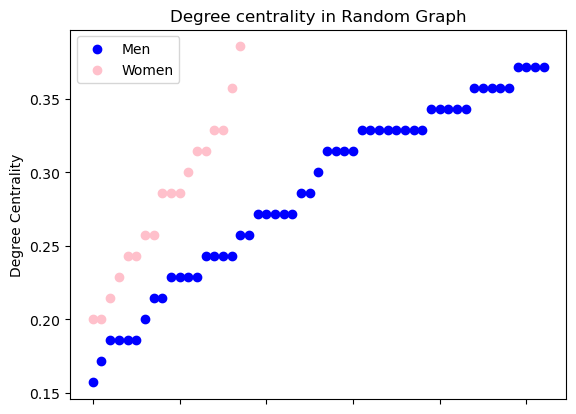

In [131]:
# Trier le dataframe par ordre croissant de degrés de centralité
df_sorted = df_G_Node.sort_values(by='Degree Centrality')

# Créer une figure et des axes
fig, ax = plt.subplots()

# Tracer les points pour tous les attributs (hommes et femmes) avec des couleurs appropriées
for attribut, color in [('men', 'blue'), ('women', 'pink')]:
    df_attribut = df_sorted[df_sorted['Attribut'] == attribut]
    ax.scatter(range(len(df_attribut)), 
               df_attribut['Degree Centrality'], 
               color=color, label=attribut.capitalize())

# Ajouter les labels et le titre
ax.set_xticklabels([])
ax.set_ylabel('Degree Centrality')
ax.set_title('Degree centrality in Random Graph')

# Afficher la légende
ax.legend()
plt.savefig("Graphs/degree_random.jpg")

# Afficher le graphique
plt.show()

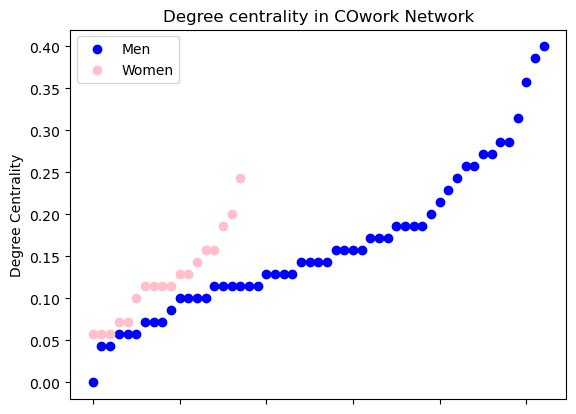

In [132]:
# Trier le dataframe par ordre croissant de degrés de centralité
df_sorted = df_C_Node.sort_values(by='Degree Centrality')

# Créer une figure et des axes
fig, ax = plt.subplots()

# Tracer les points pour tous les attributs (hommes et femmes) avec des couleurs appropriées
for attribut, color in [(1, 'blue'), (2, 'pink')]:
    df_attribut = df_sorted[df_sorted['Attribut'] == attribut]
    ax.scatter(range(len(df_attribut)), 
               df_attribut['Degree Centrality'], 
               color=color, label='Men' if attribut == 1 else 'Women')
# Ajouter les labels et le titre
ax.set_xticklabels([])
ax.set_ylabel('Degree Centrality')
ax.set_title("Degree centrality in COwork Network")

# Afficher la légende
ax.legend()
plt.savefig("Graphs/degree_work.jpg")
             
# Afficher le graphique
plt.show()

In [165]:
# Créer un sous-graphe contenant uniquement les partenaires
partner_nodes = [node for node, data in ELcowork.nodes(data=True) if data['Status'] == 1]
partner_graph = ELcowork.subgraph(partner_nodes)

# Réseau des associés
asso_nodes = [node for node, data in ELcowork.nodes(data=True) if data['Status'] == 2]
asso_graph = ELcowork.subgraph(asso_nodes)

# Créer un sous-graphe contenant uniquement les liens entre partenaires et associés
partner_associate_edges = [(u, v) for u, v, data in ELcowork.edges(data=True) if (ELcowork.nodes[u]['Status'] == 1 and ELcowork.nodes[v]['Status'] == 2) or (ELcowork.nodes[u]['Status'] == 2 and ELcowork.nodes[v]['Status'] == 1)]
partner_associate_graph = nx.Graph(partner_associate_edges)


Clearly, the centrality is lower for the COWork network, but we will control by status.

In [166]:
#Number of status by gender
nb_pm = df[(df['status'] == 1) & (df['Gender'] == 1)].shape[0] #Number of men partner 
nb_pf = df[(df['status'] == 1) & (df['Gender'] == 2)].shape[0] #Number of women partner 
nb_am = df[(df['status'] == 2) & (df['Gender'] == 1)].shape[0] #Number of men associate 
nb_af = df[(df['status'] == 2) & (df['Gender'] == 2)].shape[0] #Number of women associate

#Density varie selon la nature du lien 
p1 = nx.density(partner_graph)
p2 = nx.density (asso_graph)
p3 = nx.density(partner_associate_graph)

nodes_A = set(range(nb_pm))
nodes_B = set(range(nb_pm, nb_pm + nb_pf))
nodes_C = set(range(nb_pm + nb_pf, nb_pm + nb_pf + nb_am))
nodes_D = set(range(nb_pm + nb_pf+ nb_am, nb_pm + nb_pf + nb_am + nb_af))

G2 = nx.Graph()

G2.add_nodes_from(nodes_A, attr='men', status='partner')
G2.add_nodes_from(nodes_B, attr='women', status='partner')
G2.add_nodes_from(nodes_C, attr='men', status='associate')
G2.add_nodes_from(nodes_D, attr='women', status='associate')

# Ajout des arêtes entre les nœuds
# Ajouter les arêtes entre les nœuds
for node1 in G2.nodes():
    for node2 in G2.nodes():
        # Vérifier si les nœuds sont différents
        if node1 != node2:
            # Récupérer les attributs et le statut de chaque nœud
            attr1, status1 = G2.nodes[node1]['attr'], G2.nodes[node1]['status']
            attr2, status2 = G2.nodes[node2]['attr'], G2.nodes[node2]['status']
            
            # Définir la probabilité en fonction de la nature des attributs et du statut
            if status1 == 'partner' and status2 == 'partner':
                p = p1
            elif status1 == 'associate' and status2 == 'associate':
                p = p2
            else:
                p = p3
            
            # Ajouter l'arête avec une probabilité p
            if random.random() < p:
                G2.add_edge(node1, node2)

In [167]:
# Calcul des degrés de centralité
degree_centrality = nx.degree_centrality(G2)

# Création d'une liste pour stocker les données de chaque nœud
data = []

# Itérer sur les nœuds pour récupérer les informations nécessaires
for node in G2.nodes():
    # Numéro de la node
    node_number = node
    # Attribut (men ou women)
    attribute = G2.nodes[node]['attr']
    status = G2.nodes[node]['status']
    # Degré de centralité
    centrality = degree_centrality[node]
    # Ajouter les données à la liste
    data.append([node_number, attribute, status, centrality])

# Création du dataframe
df_G2_Node = pd.DataFrame(data, columns=['Node', 'Attribut', 'Status', 'Degree Centrality'])

df_G2_Node

,Node,Attribut,Status,Degree Centrality
0,0,men,partner,0.214286
1,1,men,partner,0.214286
2,2,men,partner,0.228571
3,3,men,partner,0.314286
4,4,men,partner,0.328571
...,...,...,...,...
66,59,women,associate,0.242857
67,60,women,associate,0.171429
68,61,women,associate,0.142857
69,62,women,associate,0.271429


In [168]:
# Calcul des degrés de centralité
degree_centrality = nx.degree_centrality(ELcowork)

# Création d'une liste pour stocker les données de chaque nœud
data = []

# Itérer sur les nœuds pour récupérer les informations nécessaires
for node in ELcowork.nodes():
    # Numéro de la node
    node_number = node
    # Attribut (men ou women)
    attribute = ELcowork.nodes[node]['Gender']
    status = ELcowork.nodes[node]['Status']
    # Degré de centralité
    centrality = degree_centrality[node]
    # Ajouter les données à la liste
    data.append([node_number, attribute, status, centrality])

# Création du dataframe
df_C_Node2 = pd.DataFrame(data, columns=['Node', 'Attribut', 'Status', 'Degree Centrality'])

df_C_Node2

,Node,Attribut,Status,Degree Centrality
0,1,1,1,0.057143
1,17,1,1,0.314286
2,39,2,2,0.157143
3,40,1,2,0.185714
4,41,1,2,0.228571
...,...,...,...,...
66,68,1,2,0.085714
67,21,1,1,0.100000
68,69,2,2,0.057143
69,23,1,1,0.114286


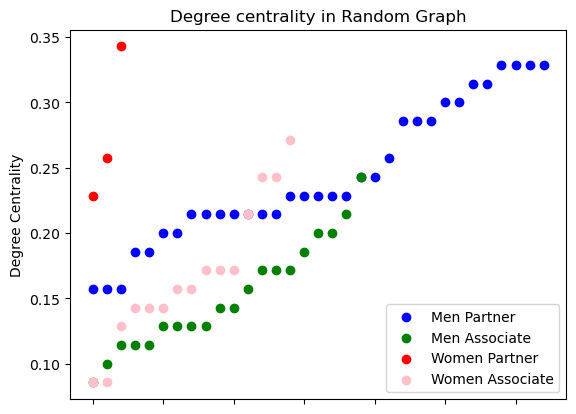

In [169]:
# Trier le dataframe par ordre croissant de degrés de centralité
df_sorted = df_G2_Node.sort_values(by='Degree Centrality')

# Créer une figure et des axes
fig, ax = plt.subplots()

# Définir les couleurs pour chaque attribut
colors = {'men_partner': 'blue', 'men_associate': 'green', 'women_partner': 'red', 'women_associate': 'pink'}

# Définir les couleurs pour chaque combinaison d'attribut et de statut
colors = {('men', 'partner'): 'blue', 
          ('men', 'associate'): 'green', 
          ('women', 'partner'): 'red', 
          ('women', 'associate'): 'pink'}

# Tracer les points pour toutes les combinaisons d'attribut et de statut avec des couleurs appropriées
for (attribut, status), color in colors.items():
    df_attribut = df_sorted[(df_sorted['Attribut'] == attribut) & (df_sorted['Status'] == status)]
    ax.scatter(range(len(df_attribut)), 
               df_attribut['Degree Centrality'], 
               color=color, label=f"{attribut.capitalize()} {status.capitalize()}")

# Ajouter les labels et le titre
ax.set_xticklabels([])
ax.set_ylabel('Degree Centrality')
ax.set_title('Degree centrality in Random Graph')

# Afficher la légende
ax.legend()

# Enregistrer le graphique
plt.savefig("Graphs/degree_random_status.jpg")

# Afficher le graphique
plt.show()

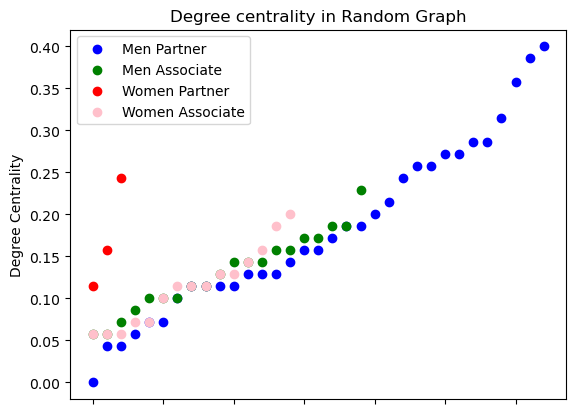

In [170]:
# Trier le dataframe par ordre croissant de degrés de centralité
df_sorted = df_C_Node2.sort_values(by='Degree Centrality')

# Créer une figure et des axes
fig, ax = plt.subplots()

# Définir les couleurs pour chaque attribut
colors = {'men_partner': 'blue', 'men_associate': 'green', 'women_partner': 'red', 'women_associate': 'pink'}

# Définir les couleurs pour chaque combinaison d'attribut et de statut
colors = {(1,1): 'blue', 
          (1, 2): 'green', 
          (2, 1): 'red', 
          (2, 2): 'pink'}

# Tracer les points pour toutes les combinaisons d'attribut et de statut avec des couleurs appropriées
for (attribut, status), color in colors.items():
    df_attribut = df_sorted[(df_sorted['Attribut'] == attribut) & (df_sorted['Status'] == status)]
    ax.scatter(range(len(df_attribut)), 
               df_attribut['Degree Centrality'], 
               color=color,  label=f"{['men', 'women'][attribut-1].capitalize()} " \
                                    f"{['partner', 'associate'][status-1].capitalize()}")

# Ajouter les labels et le titre
ax.set_xticklabels([])
ax.set_ylabel('Degree Centrality')
ax.set_title('Degree centrality in Random Graph')

# Afficher la légende
ax.legend()

# Enregistrer le graphique
plt.savefig("Graphs/degree_cowork_status.jpg")

# Afficher le graphique
plt.show()